## How can advanced machine learning techniques improve the accuracy and efficiency of credit card fraud detection compared to traditional methods?

This notebook looks into using advanced techniques to improve the accuracy and efficiency of credit card fraud detection compared to traditional methods.

### Data

The Dataset used in this notebook, came from Credit Card Fraud Detection Kaggle https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

**Features**


*  Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
*   Amount: Transaction amount
*   v1 - v28: principal components obtained with PCA
*   Class - Genuine or Fraudlent










### Importation of Libraries

We will be using pandas, numpy, tensorflow, keras etc

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

In [1]:
# !pip install tensorflow-addons
# !conda install pytorch
# !pip install torchvision 

In [2]:
#Regular Exploratory Data Analysis and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import models for Advanced Machine Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow import feature_column
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from tensorflow_addons.activations import sparsemax
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader


#Import models for Traditional Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.image as img



#Other
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

/Users/gospel/Documents/Freelance/MachineLearning/NewFraudDetection/env/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Load Data

In [3]:
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

### Exploratory Data Anaylysis

In [4]:
## Show the top 5 rows of your dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
## Check if data contains missing values

data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
## Statistical Description of our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
# Check the value counts of 'Class' column
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
## Check for duplicated rows, which can affect the quality, accuracy, and reliability of our analysis and lead to erroneous conclusions or decisions

data.duplicated().sum()

1081

**Observation:** There are 1081 Duplicates

In [10]:
data = data.drop_duplicates(keep='first')
new_df = data.copy()

In [11]:
data.shape

(283726, 31)

### Data Visualization

In [12]:
sns.set_theme()

In [13]:
LABELS = ['Genuine', 'Fraud']

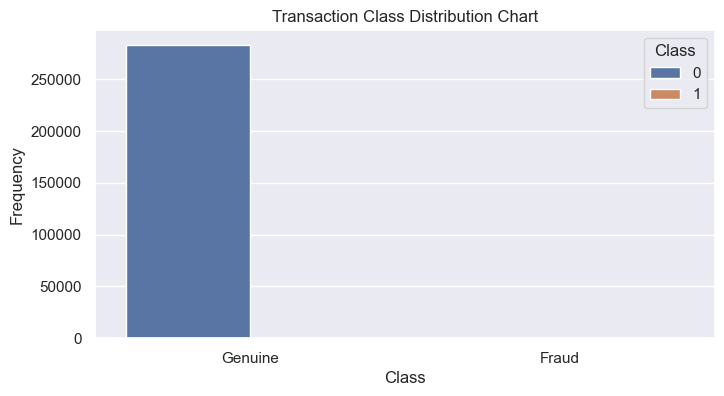

In [14]:
## Bar chart representation of 'Class' distribution

plt.figure(figsize=(8, 4))
sns.countplot(data = data, x='Class', hue='Class')
plt.title('Transaction Class Distribution Chart')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(2), LABELS)
plt.show()

This shows that our target class is imbalanced

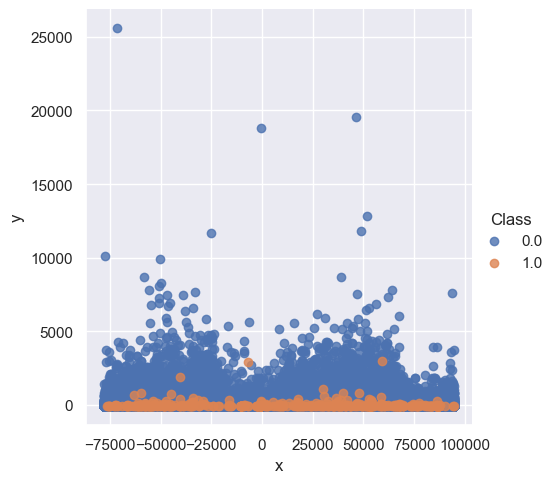

In [15]:
#PCA is performed for visualization only
pca= PCA(n_components=2)
data_2d= pd.DataFrame(pca.fit_transform(data.iloc[:,0:30]))
data_2d= pd.concat([data_2d, data['Class']], axis=1)
data_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=data_2d, fit_reg=False, hue='Class')

The above plot gives a better visualization of the imbalance in the dataset

In [16]:
## This will help in our data visualizations
Genuine = data[data['Class']==0]
Fraud = data[data['Class']==1]
Genuine.shape, Fraud.shape

((283253, 31), (473, 31))

In [47]:
Genuine.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [48]:
Fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
## describe fraud data
Fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,473.0,80450.513742,48636.179973,406.000000,41203.000000,73408.000000,129095.000000,170348.000000
V1,473.0,-4.498280,6.593145,-30.552380,-5.603690,-2.271755,-0.361428,2.132386
V2,473.0,3.405965,4.122500,-8.402154,1.145381,2.617105,4.571743,22.057729
V3,473.0,-6.729599,6.909647,-31.103685,-7.926507,-4.875397,-2.171454,2.250210
V4,473.0,4.472591,2.871523,-1.313275,2.288644,4.100098,6.290918,12.114672
V5,473.0,-2.957197,5.278831,-22.105532,-4.278983,-1.372245,0.260821,11.095089
V6,473.0,-1.432518,1.715347,-6.406267,-2.450444,-1.420468,-0.413647,6.474115
V7,473.0,-5.175912,6.858024,-43.557242,-6.989195,-2.902079,-0.907188,5.802537
V8,473.0,0.953255,5.585950,-41.044261,-0.161518,0.617738,1.709417,20.007208
V9,473.0,-2.522124,2.465047,-13.434066,-3.796760,-2.099049,-0.788388,3.353525


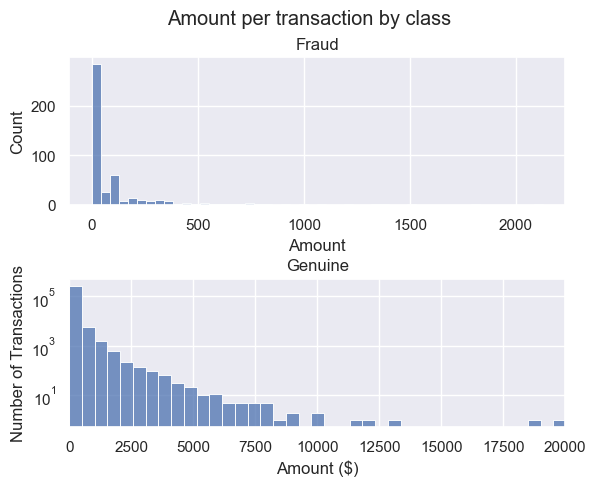

In [18]:
## Chart of Amount per Transaction by 'Class'
bins = 50
fig, axes = plt.subplots(2,1)
fig.suptitle('Amount per transaction by class')
sns.histplot(data=Fraud.Amount, ax=axes[0], bins=bins).set(title='Fraud')
sns.histplot(data=Genuine.Amount, ax=axes[1], bins=bins, log_scale=(False, True)).set(title='Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

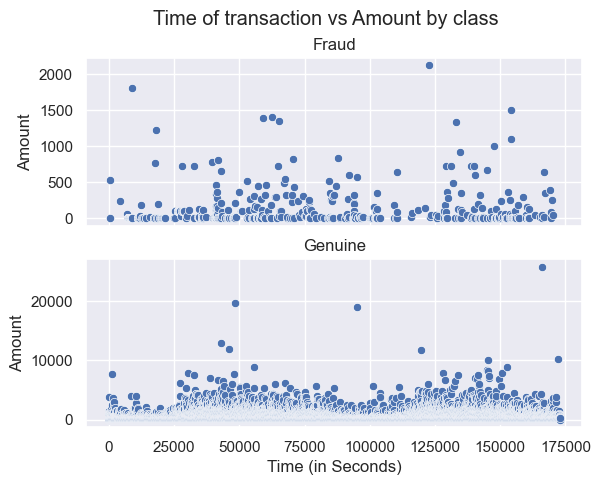

In [19]:
## Graph of Time of Transaction vs Amount by class
fig, axes = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')
plt.xlabel('Time (in Seconds)')
sns.scatterplot(data=Fraud, x=Fraud.Time, y=Fraud.Amount, ax=axes[0]).set(title='Fraud')
sns.scatterplot(data=Genuine, x=Genuine.Time, y=Genuine.Amount, ax=axes[1]).set(title='Genuine')
plt.show();

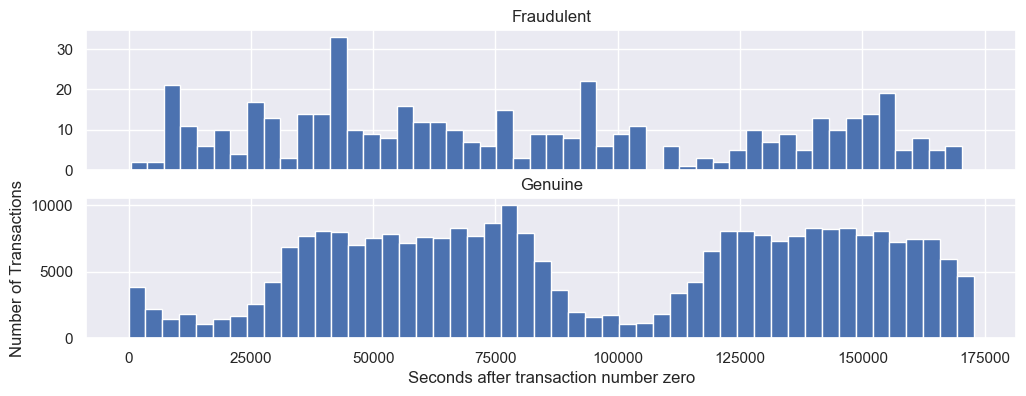

In [20]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(data["Time"][data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(data["Time"][data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

The transactions occur in a cyclic way. But the time feature does not provide any useful information as the time when the first transaction was initiated is not given.

In [21]:
#Variance
data.var()

Time      2.254450e+09
V1        3.794806e+00
V2        2.711631e+00
V3        2.276121e+00
V4        1.999916e+00
V5        1.896152e+00
V6        1.774039e+00
V7        1.507159e+00
V8        1.390169e+00
V9        1.200104e+00
V10       1.158653e+00
V11       1.037791e+00
V12       9.893773e-01
V13       9.908802e-01
V14       9.067136e-01
V15       8.370304e-01
V16       7.633453e-01
V17       7.098186e-01
V18       7.012011e-01
V19       6.615847e-01
V20       5.928757e-01
V21       5.240448e-01
V22       5.249734e-01
V23       3.890047e-01
V24       3.667837e-01
V25       2.716706e-01
V26       2.323750e-01
V27       1.566132e-01
V28       1.076015e-01
Amount    6.269988e+04
Class     1.664328e-03
dtype: float64

The Amount Column needs to be scaled, and Time Column dropped. If a feature has a variance order of magnitude, larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

In [22]:
#dropping Time because it does not give any valuable information
data = data.drop("Time", axis = 1)
data.shape

(283726, 30)

<Axes: xlabel='Class', ylabel='Amount'>

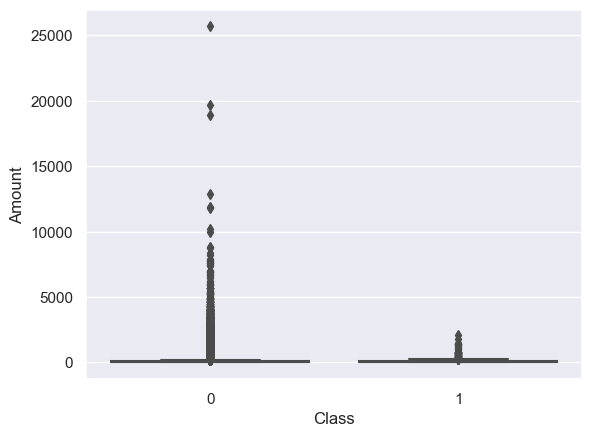

In [23]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=data['Class'], y=data['Amount'])

The Genuine instances are highly skewed. The outliers can be seen visually and thus, it's better to use a Robust Scaler to scale the feature 'Amount' as it is less prone to outliers.

In [24]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
data['S_Amount'] = Rob_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,S_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.774718
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.268530
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.959811
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.411487
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.667362


In [25]:
#drop Amount and move Std_Amount at index '0'
data = data.drop('Amount',axis=1)
S_Amount = data['S_Amount']
data.drop('S_Amount', axis=1, inplace=True)
data.insert(0, 'S_Amount', S_Amount)
data2 = data.copy() #This will be used subsequently
data.head()

,S_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


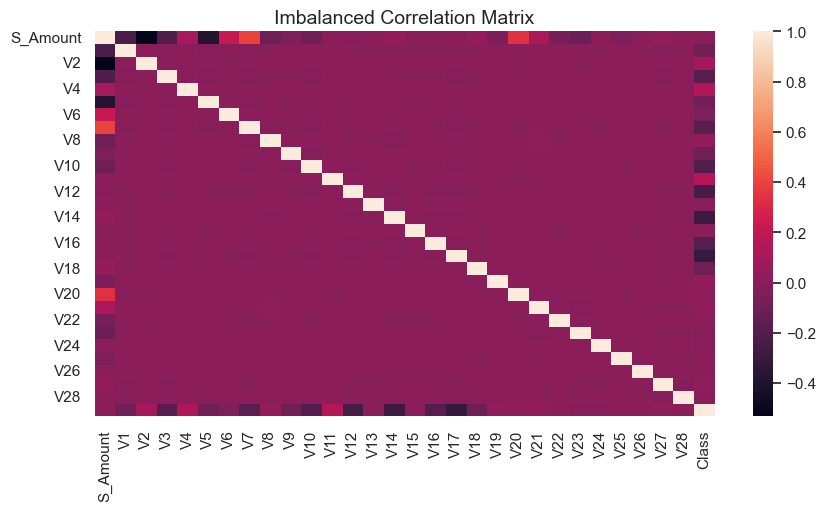

In [26]:
## Correlation Chart of each feature to the label
f, ax1 = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr())
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [27]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
#     df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

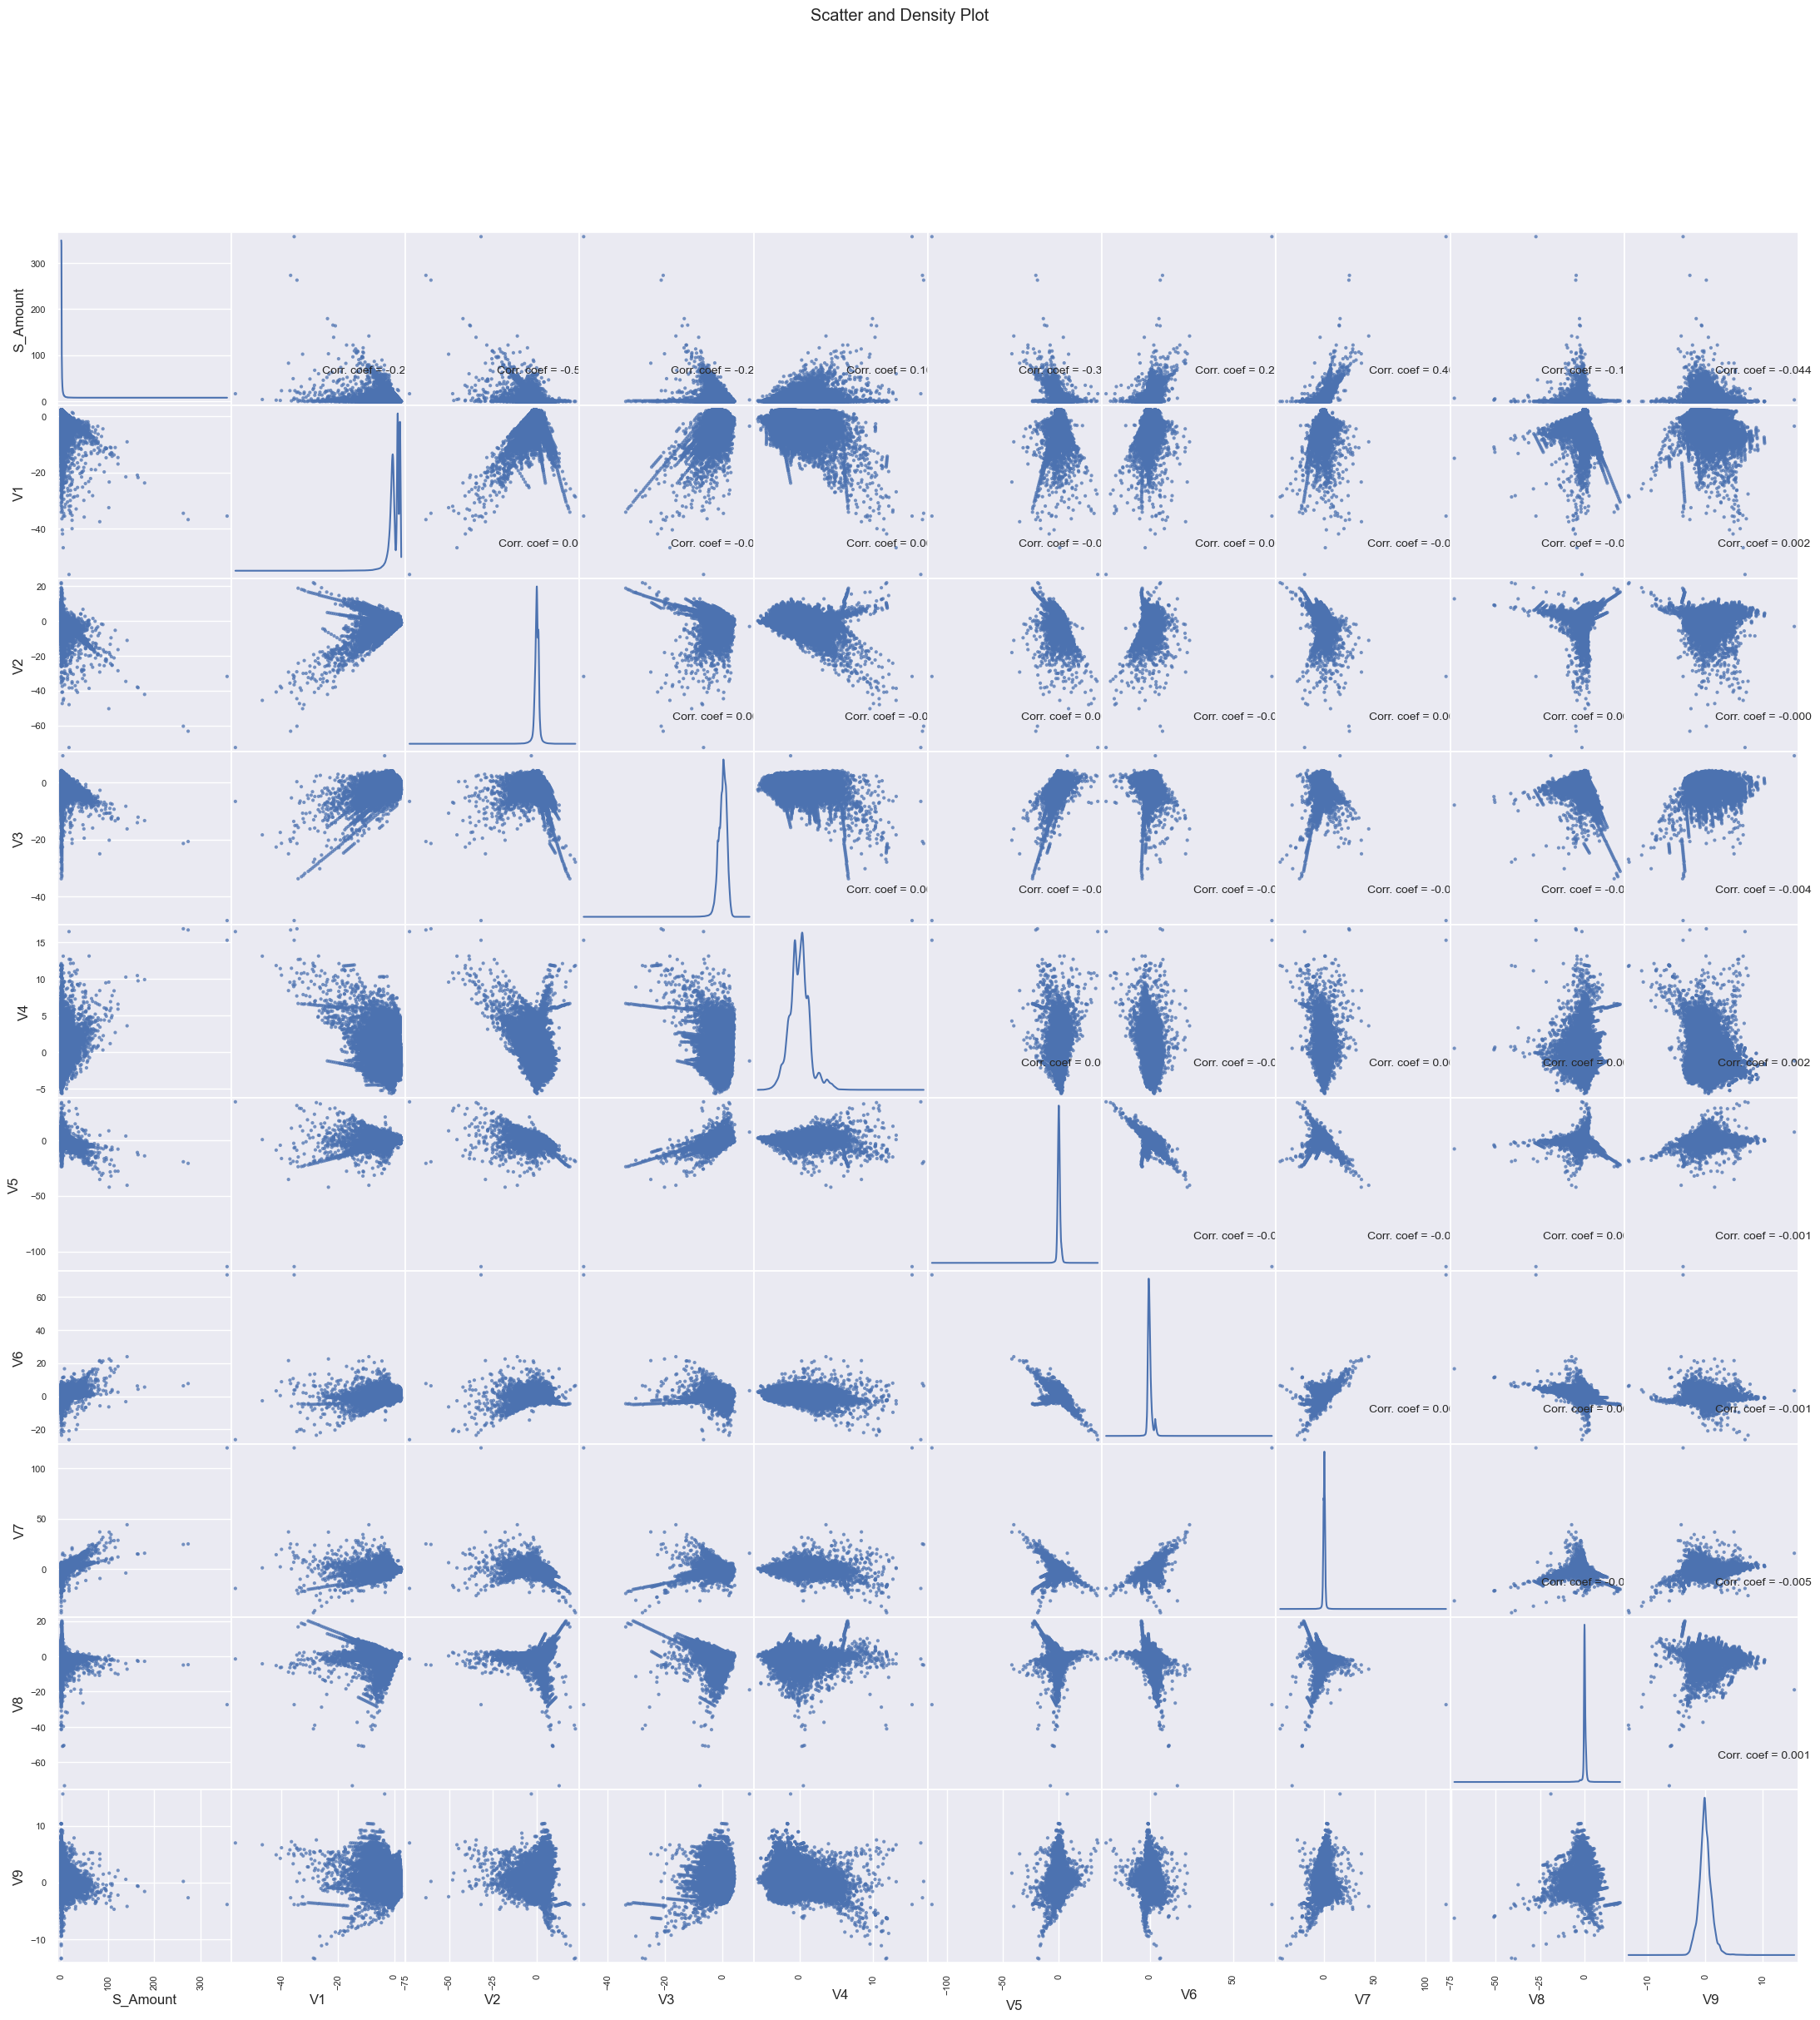

In [28]:
plotScatterMatrix(data, 27, 10)

### Split Dataset

Split the dataset into training set (80%) and test set (20%)

In [29]:
# #Split dataset to train, valid and test sets
def splitData(data, test_size):
  #Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

  X = data.drop('Class', axis=1)
  Y = data['Class']

  sss1 = StratifiedShuffleSplit(n_splits=5, test_size=test_size, random_state=42)

  for train_index1, test_index in sss1.split(X, Y):
      print("Train:", train_index1, "Test:", test_index)
      x_train, x_test = X.iloc[train_index1], X.iloc[test_index]
      y_train, y_test = Y.iloc[train_index1], Y.iloc[test_index]



  return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = splitData(data,0.2)



Train: [225399 133746 185792 ... 241772  60347  66795] Test: [ 86249 250634  20163 ... 115100 186966   8228]
Train: [198576 119375  31054 ...      5 265403  53673] Test: [ 13489 203234  68989 ... 280403 134208 224305]
Train: [127226 189028 176704 ... 241840 122469 137312] Test: [124615 237217  39824 ... 196634  32580 235597]
Train: [229705 214874  59279 ... 200666  81675   8171] Test: [235940 260800 213346 ...  15018  48654 269447]
Train: [ 21983  16988  18664 ... 154953 171683 208410] Test: [147277 227806 180974 ... 116172 204028  69600]


In [30]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.99833466 0.00166534]
[0.99832587 0.00167413]


As seen above, the labels are almost equally distributed in all the three datasets

In [31]:
#Dimensionality of the datasets retrieved after splitting
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(226980, 29)
(226980,)
(56746, 29)
(56746,)


### Balance Dataset

Earlier, we establishd that the dataset was imbalanced which will impact greatly on our model,
 I'll be using ADASYN to oversample the minority class

In [32]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
x_resampled, y_resampled = ada.fit_resample(x_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))
print('Shape of x_resampled: {}'.format(x_resampled.shape))
print('Shape of y_resampled: {}'.format(y_resampled.shape))

Resampled dataset shape Counter({1: 226604, 0: 226602})
Shape of x_resampled: (453206, 29)
Shape of y_resampled: (453206,)


In [33]:
## check the count of the class coloumn
sum(y_resampled == 1), sum(y_resampled == 0)

(226604, 226602)

ADASYN Algorithm has oversampled the minority instances, x_resampled and y_resampled are the balanced dataset

In [34]:
print(type(x_resampled))
print(type(y_resampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [35]:
#Let's merge x_resampled and y_resampled based on the index values
#to get a single dataframe in order to visualize a correlation matrix
new_data= pd.merge(x_resampled, y_resampled, how='inner', left_index=True, right_index=True)
new_data.head()

,S_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,9.428452,-4.467683,-5.733586,1.578410,-0.817911,0.490251,-1.788576,-0.131786,0.317581,2.055260,...,2.249875,0.735319,0.105608,1.886614,0.341716,1.062629,0.044292,-0.314862,0.178963,0
1,3.600473,-1.016433,-0.605323,1.353546,-1.894865,-1.108174,-0.731919,1.280971,-0.295647,-1.630660,...,0.222442,-0.239999,-0.801529,0.596002,0.401621,-0.122669,1.111292,-0.123576,0.106690,0
2,0.078988,-0.668004,1.053984,-0.508153,0.207806,2.139490,3.835436,-0.173976,1.390290,-0.595179,...,0.212259,-0.064853,-0.162610,-0.121953,1.011447,0.171782,-0.235638,0.284162,0.139879,0
3,-0.094980,-1.813943,2.008905,0.044825,2.603376,1.300422,-0.178899,0.990545,0.700731,-3.026574,...,-0.320050,0.263534,0.296752,-0.691916,-0.313137,1.256870,0.279155,-0.413854,-0.179364,0
4,0.163260,-1.410279,1.021497,0.616267,-0.116389,0.493215,-0.202298,0.558662,0.478436,-0.780591,...,-0.457357,0.162972,0.193745,-0.368172,-0.324074,0.111269,-0.520701,-0.221053,-0.061031,0


Text(0.5, 1.0, 'Balanced Correlation Matrix')

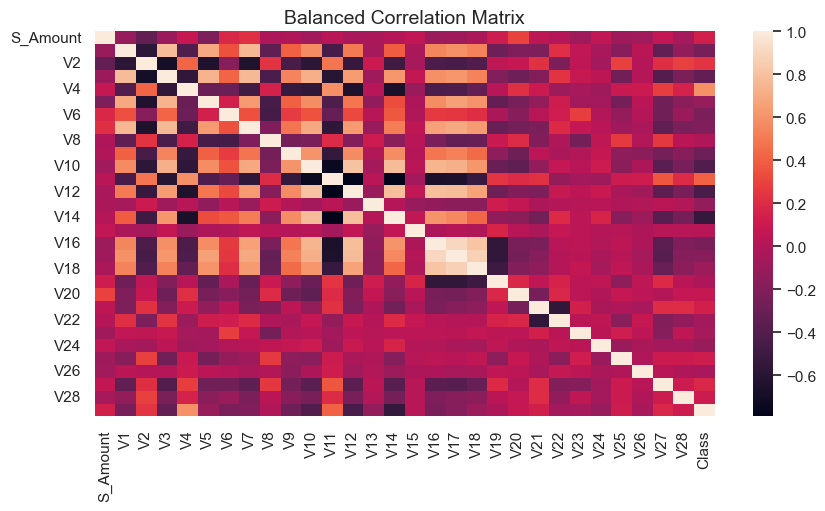

In [36]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(10,5))

sns.heatmap(new_data.corr())
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

**Observations**:
Negative and Positive Correlations can be seen in the matrix above:

1.  Features, V14, V12, V10 and V3 show negative correlation towards the 'Class'.
2.   Features V4, V11, V2 and V19 show positive correlation..






### Modelling with traditional Machine Learning Algorithms

I will be using LogisticRegression, Random Forest Classifier, K Nearest Neighbors Classifier for this section


In [37]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "SVM": svm.SVC(kernel='linear'),
         "Random Forest": RandomForestClassifier()}

In [38]:
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #second splitting after oversampling

for train_index2, val_index in sss2.split(x_resampled, y_resampled):
    print("Train:", train_index2, "Validation:", val_index)
    x_train, x_valid = x_resampled.iloc[train_index2], x_resampled.iloc[val_index]
    y_train, y_valid = y_resampled.iloc[train_index2], y_resampled.iloc[val_index]

Train: [ 62182 375556  38306 ... 108874 356124 168861] Validation: [282263  58201 429613 ... 280813 127396 369102]
Train: [120397 192352 215601 ... 203546 182077 338152] Validation: [151321 392544 295838 ...  70730  75921 332093]
Train: [392832 285960 290906 ... 137397 402939  28450] Validation: [ 27434 139747 231706 ...  34966  55094 242740]
Train: [  5797 301705  30904 ... 320842 145664   1182] Validation: [198871 419398 344480 ... 276711 426603 374693]
Train: [411142 433496 341765 ... 304545 318988  77844] Validation: [281902  91649 155568 ... 390597 293522 352705]


In [39]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_valid, y_train, y_valid, X_test):
    """
    fit and evaluate given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores = {}
    #Make a dictionary to keep model predictions
    model_predictions = {}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to the model_score
        model_scores[name] = model.score(X_valid.values, y_valid)
        #Make predictions and append its data to the model_predictions
        model_predictions[name] = model.predict(X_test.values)
    return model_scores, model_predictions

In [40]:
model_scores, model_predictions = fit_and_score(models=models,
                            X_train=x_train,  X_valid=x_valid,
                                                y_train=y_train, y_valid=y_valid,X_test=x_test)
model_scores

{'Logistic Regression': 0.8930186889080117,
 'SVM': 0.9055625427506012,
 'Random Forest': 0.9999117406941594}

Random Forest model performed very well, so I'll be picking random forest as my Traditional Machine Learning Specimen

In [49]:
#Plot conf matrix
def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(5,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=True, fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [53]:
#Plot ROC Curve 
def roc_plot(predictions):
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show();

In [66]:
# Plot PR AUC curve
def pr_curve(predictions):
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    pr_auc = auc(precision, recall)
    plt.plot(recall, precision, label='AUC = %0.4f'% pr_auc)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("PR");


Test ROC AUC 0.9386921213821654
Test PR AUC 0.0188


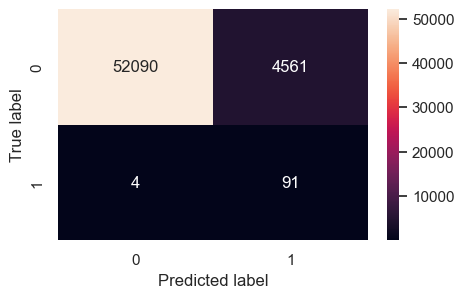

In [50]:
#Logistic Regression
print('Test ROC AUC', roc_auc_score(y_test, model_predictions['Logistic Regression']))
print('Test PR AUC', np.round(average_precision_score(y_test, model_predictions['Logistic Regression']), 4))

plot_conf_mat(y_test, model_predictions['Logistic Regression']);

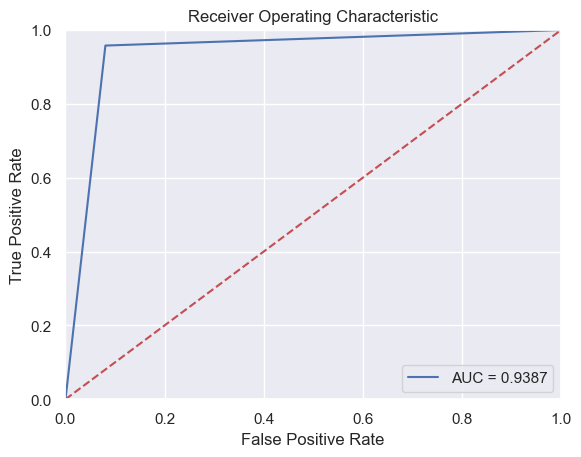

In [54]:
#ROC curve plot for Logistic Regression
roc_plot(model_predictions['Logistic Regression'])

Test ROC AUC 0.9318579409105984
Test PR AUC 0.0177


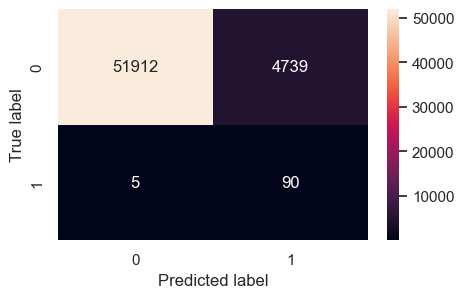

In [51]:
#SVM
print('Test ROC AUC', roc_auc_score(y_test, model_predictions['SVM']))
print('Test PR AUC', np.round(average_precision_score(y_test, model_predictions['SVM']), 4))

plot_conf_mat(y_test, model_predictions['SVM']);

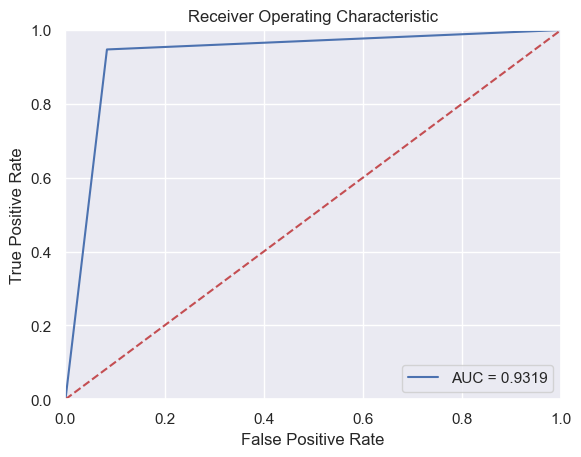

In [55]:
#ROC curve plot for Logistic Regression
roc_plot(model_predictions['SVM'])

In [44]:
#Random Forest
print('Test ROC AUC', roc_auc_score(y_test, model_predictions['Random Forest']))
print('Test PR AUC', np.round(average_precision_score(y_test, model_predictions['Random Forest']), 4))

Test ROC AUC 0.9261480960525619
Test PR AUC 0.6909


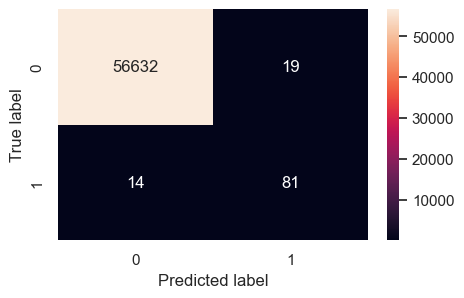

In [52]:


plot_conf_mat(y_test, model_predictions['Random Forest']);

Random Forest had an ROC AUC of 0.92 and a PR AUC of 0.6808

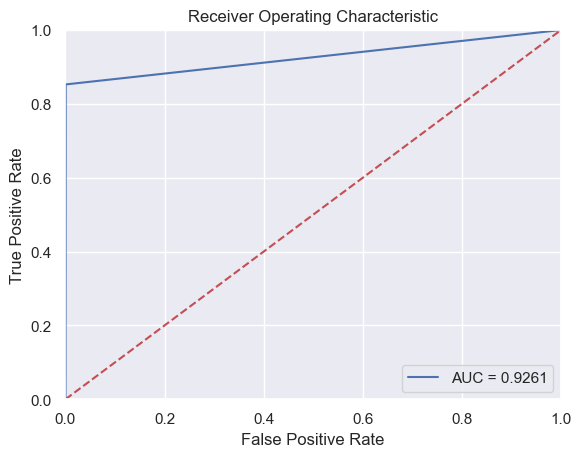

In [56]:
#ROC curve plot for Logistic Regression
roc_plot(model_predictions['Random Forest'])

### Modelling with Advanced Machine Learning models

We will be using Some sophisticated Machine learning models for this

In [44]:
#function for confusion matrix
def conf_matrix(predicted_values, dataset, y_test):
    Predictions_CM = confusion_matrix(y_test, predicted_values, labels = [0, 1])
    class_feat=dataset['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [46]:
# Take a random sample of 1000 normal transactions and all fraud transactions
non_fraud = new_df[new_df['Class'] == 0].sample(1000)
fraud = new_df[new_df['Class'] == 1]

# Shuffle fraud and non_fraud samples and separate into features and labels
df = non_fraud._append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
y = df["Class"].values

In [47]:
green, yellow = '#00A36C', '#ffcc00'
def tsne_plot(X, y, name, title='TSNE plot of Fraud and Non Fraud'):
  tsne = TSNE(n_components=2, random_state=24, init='random', learning_rate=200)
  X_t = tsne.fit_transform(X)

  plt.figure(figsize=(12,8))
  plt.scatter(X_t[np.where(y==0), 0], X_t[np.where(y==0), 1], color=green, alpha = 0.7, label = "Non Fraud")
  plt.scatter(X_t[np.where(y==1), 0], X_t[np.where(y==1), 1], color=yellow, alpha = 0.7, label = "Fraud")

  plt.legend(loc='best')
  plt.title(title, fontsize=16)
  plt.savefig(name)
  plt.show()

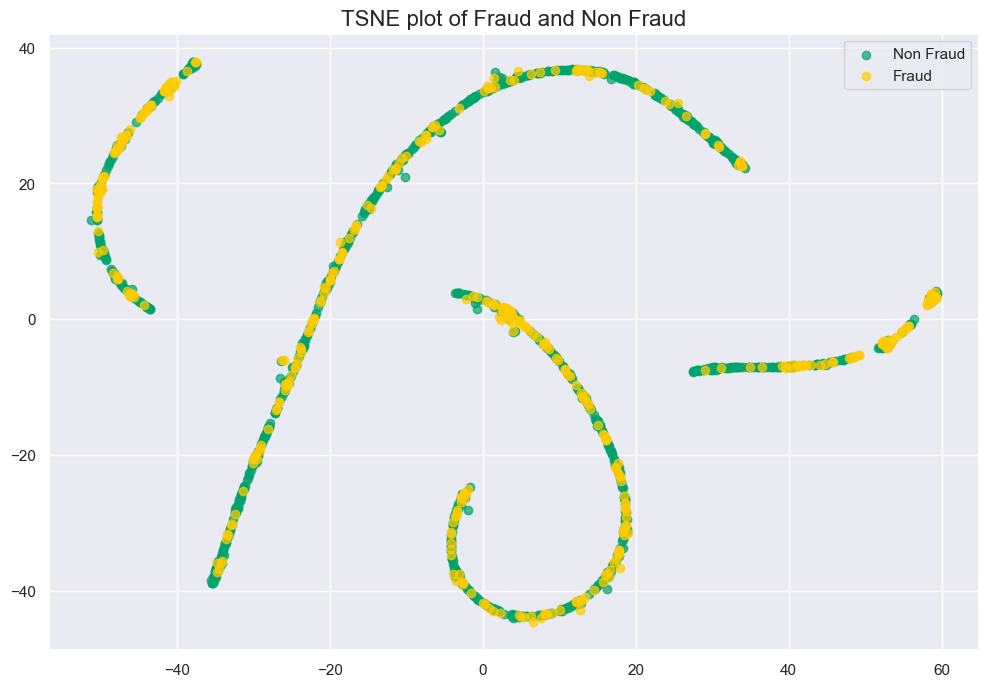

In [48]:
tsne_plot(X, y, name="initial.png")


**Observations**: The fraudulent and non-fraudulent transactions, are not linearly seperable. Most machine learning models would struggle to classify this data as-is.



In [49]:
# Convert relative 'Time' measure to hour of day
new_df["Time"] = new_df["Time"].apply(lambda x : x / 3600 % 24)

# Scale 'Time' and 'Amount'
new_df['Amount'] = StandardScaler().fit_transform(new_df['Amount'].values.reshape(-1, 1))
new_df['Time'] = StandardScaler().fit_transform(new_df['Time'].values.reshape(-1, 1))

# Separate fraudulent transactions from normal transactions
norm_data, fraud_data = new_df[new_df['Class']==0], new_df[new_df['Class']==1]

# Training data will be 2000 normal samples
# Validation data will be 1000 samples, approximately half fraud and half normal samples; shuffled and with indices reset
# We leave out 200 normal samples and 50 fraud samples for a final test dataset of 250 unseen samples; we'll choose a random subsample of these later
train_data = norm_data.iloc[:2000, :]
val_data = pd.concat([norm_data.iloc[2000:2558,:], fraud_data.iloc[:442, :]], axis =0).sample(frac=1).reset_index(drop=True)
test_samples = pd.concat([norm_data.iloc[2558:2608,:], fraud_data.iloc[442:,:]], axis=0).sample(frac=1).reset_index(drop=True)

### **AutoEncoders:**
One of the most effective ways to solve this issue is to use AutoEncoders.

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data.

While Deep Learning techniques aren’t applied to tabular data as often as unstructured data, the stark class imbalances in this dataset make it a perfect candidate for use with an autoencoder.

In [50]:
#Defining the hyperparameters
hyper_params = {
    "lr": 1e-1/10,
    "epochs": 150,
    "batch_size": 32,
    "weight_decay": 1e-8,
    'threshold': 0.75
}

In [51]:
# Create pytorch data loader for training set
train_target = torch.tensor(train_data['Class'].values.astype(np.float32))
train = torch.tensor(train_data.drop('Class', axis = 1).values.astype(np.float32))
train_tensor = data_utils.TensorDataset(train, train_target)
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = hyper_params['batch_size'], shuffle = True)

# Create pytorch data loader for validation set
val_target = torch.tensor(val_data['Class'].values.astype(np.float32))
val = torch.tensor(val_data.drop('Class', axis = 1).values.astype(np.float32))
val_tensor = data_utils.TensorDataset(val, val_target)
val_loader = data_utils.DataLoader(dataset = val_tensor, batch_size = 1, shuffle = True)

A simple Autoencoder model with two fully connected linear layers and the Tanh activation function. I'm using mean squared error as my loss function and an Adam optimizer.

In [52]:

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(30,14),
            nn.Tanh(),
            nn.Linear(14,7),
            nn.Tanh(),
            )
        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.Tanh(),
            nn.Linear(14,30),
            nn.Tanh()
            )
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [53]:
model = Autoencoder()
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=hyper_params["lr"],
                             weight_decay=hyper_params['weight_decay'])



A predictions table is created within the training and validation loops by defining a pd dataframe, the relevant columns are appended.

In [54]:
for epoch in range(hyper_params['epochs']):
    losses = []
    for (df, _) in train_loader:
        # ===================forward=====================
        output = model(df)
        loss = mseloss(output, df)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().cpu().numpy())
    # ===================log========================


    losses = []
    labels = []
    preds = []
    embeds = []

    for ds, label in val_loader:
        # ===================forward=====================
        reconstructed = model(ds)
        loss = torch.sigmoid(mseloss(reconstructed, ds)).item()
        losses.append(round((loss),6))
        labels.append(label.item())
        preds.append(reconstructed[0][-1].item())
        embeds.append(reconstructed[0][:-1].detach().cpu().numpy())

    # ===================log========================


    if epoch == (hyper_params["epochs"] - 1):

      df = pd.DataFrame()
      df['Reconstruction_Loss'] = losses
      df['Labels_gt'] = labels
      df['Labels_preds']= [int(x >= hyper_params['threshold']) for x in losses]

print('training complete')

training complete


In [55]:
def plot_precision_recall_curves(df):
  # Calculate precision and recall
  precision, recall, thresholds = precision_recall_curve(labels, preds)

  # Plot recall precision tradeoff
  sns.set(style="white")
  plt.figure(figsize=(8,6))
  plt.step(recall, precision, color= green, alpha=0.4, where='post')
  plt.fill_between(recall,precision,step='post',alpha=0.2,color=green)
  plt.title('Recall vs Precision', fontsize=16)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  #plt.savefig('precision_recall_curve_x.png')
  print(plt.show())

  # Plot precision and recall for different thresholds
  plt.figure(figsize=(8,6))
  plt.plot(thresholds, precision[1:], label="Precision",color= yellow, linewidth=2.5)
  plt.plot(thresholds, recall[1:], label="Recall",color= green, alpha=0.9,linewidth=2.5)
  plt.title('Precision and recall for different threshold values', fontsize=16)
  plt.xlabel('Threshold')
  plt.ylabel('Precision/Recall')
  plt.legend()
  #plt.savefig('threshold_values_x.png')
  plt.show()

In [56]:
def reconstruction_error_plot(df, ylims = (None, None), title="Reconstruction error for different classes"):
  groups = df.groupby('Labels_gt')
  sns.set(style="white")
  sns.set_palette(sns.color_palette([yellow, green]))
  fig, ax = plt.subplots(figsize=(8,6))

  for name, group in groups:
    ax.plot(group.index,
            group.Reconstruction_Loss,
            marker='o',
            ms=5,
            linestyle='',
            label= "Fraud" if name == 1 else "Nonfraud")

  ax.hlines(hyper_params['threshold'],
            ax.get_xlim()[0],
            ax.get_xlim()[1],
            colors="r",
            zorder=100,
            label='Threshold',
            linestyle='--')
  ax.legend()
  plt.title(title, fontsize=16)
  plt.ylabel("Reconstruction error")
  plt.xlabel("Data point index")
  plt.ylim(top=ylims[0], bottom=ylims[1])
  plt.legend(loc='best')
  #plt.savefig('reconstruction_error_plot_x.png')
  plt.show()

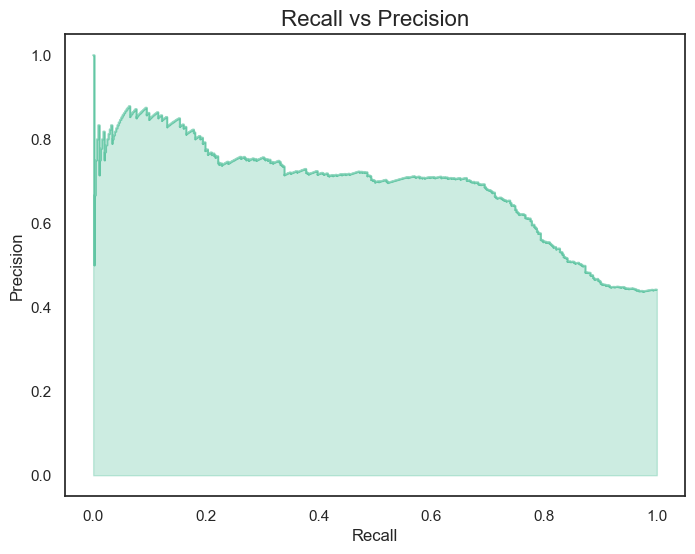

None


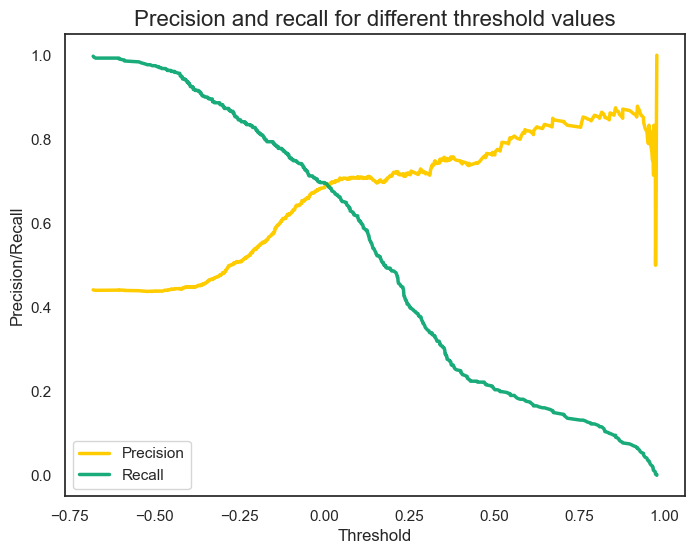

In [57]:
plot_precision_recall_curves(df)

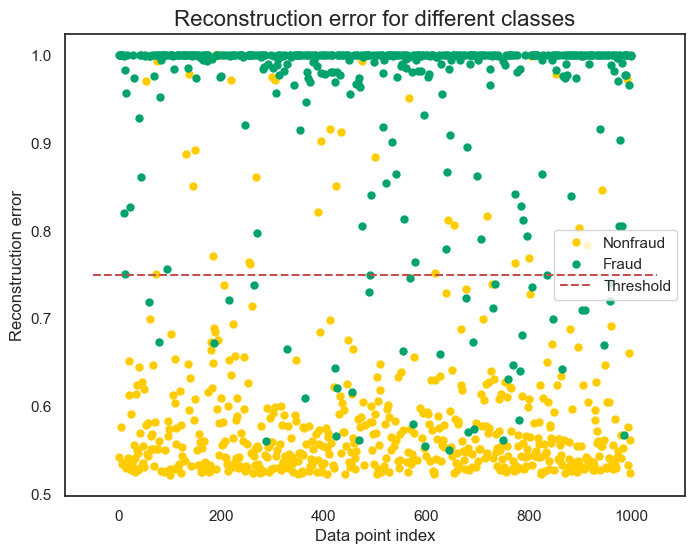

In [58]:
reconstruction_error_plot(df)

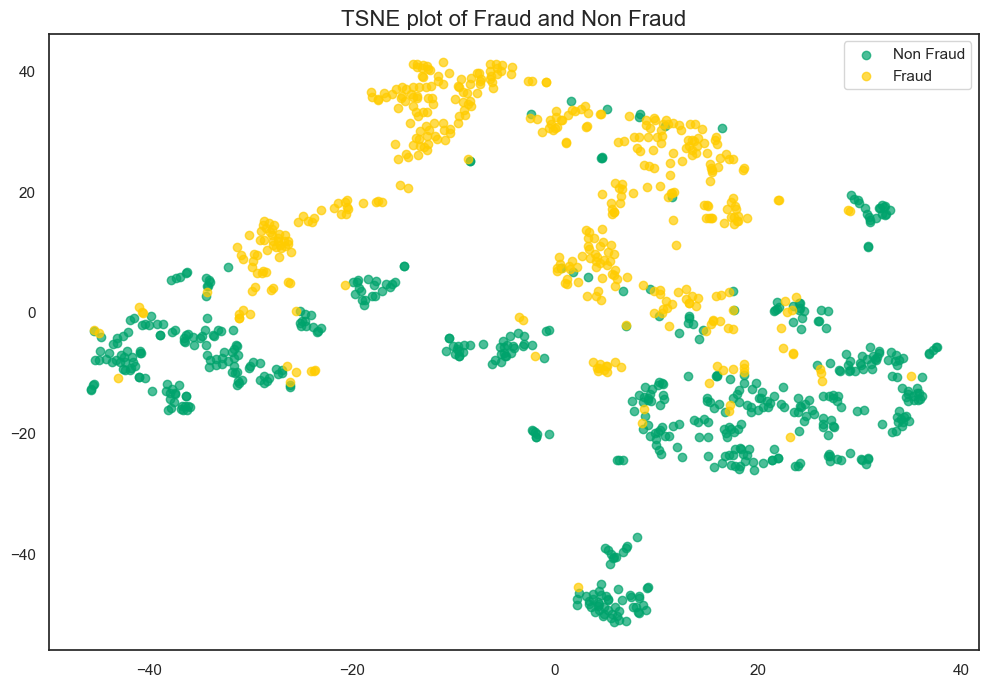

In [59]:
X = np.array(embeds)
y=df['Labels_gt'].values
tsne_plot(X, y, name='latent_rep.png')

TSNE plot after model classication

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

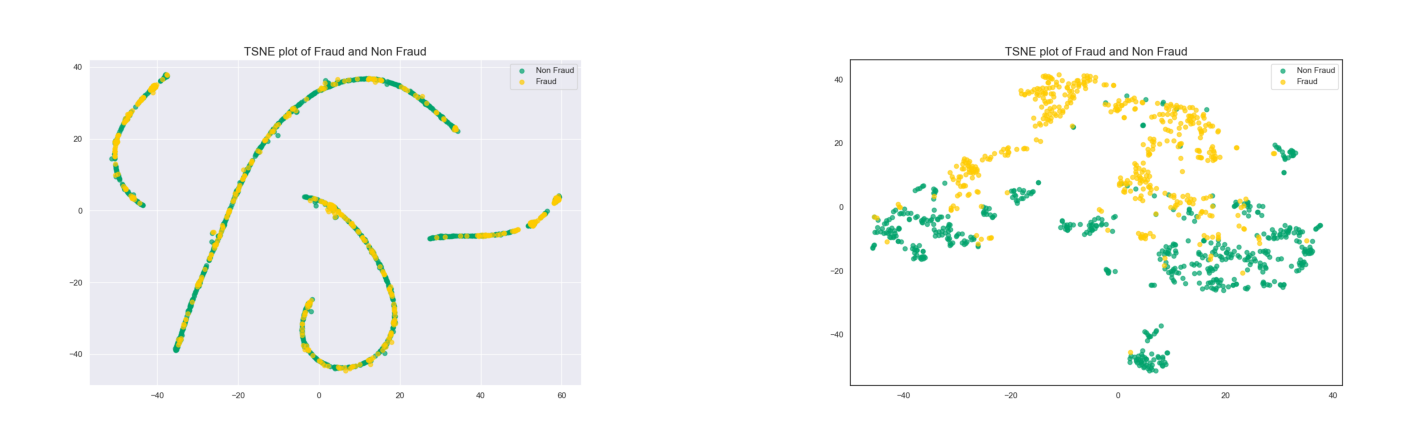

In [61]:
sns.set(style="white")
plt.figure(figsize=(18,12))

plt.subplot(1, 2, 1)
plt.imshow(img.imread('initial.png'))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img.imread('latent_rep.png'))
plt.axis('off')

plt.tight_layout



From the above graph, it will be very difficult for a machine learning algorithm to classify the data on the left.

In [62]:
print("Classification report \n {0}".format(classification_report(df.Labels_gt, df.Labels_preds)))

Classification report 
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       558
         1.0       0.91      0.90      0.91       442

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



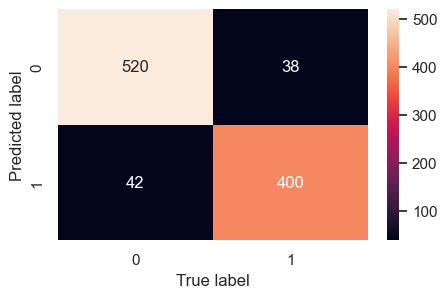

In [81]:
plot_conf_mat(df.Labels_gt, df.Labels_preds)

# **TabNet**
TabNet mimics the behaviour of decision trees using the idea of Sequential Attention. Simplistically speaking, you can think of it as a multi-step neural network that applies two key operations at each step:

1. An Attentive Transformer selects the most important features to process at the next step
2. A Feature Transformer processes the features into a more useful representation

The output of the Feature Transformer is later used in the prediction.

In [57]:
## A GLU controls which information must be allowed to further flow through the network
def glu(x, n_units=None):
    """Generalized linear unit nonlinear activation."""
    return x[:, :n_units] * tf.nn.sigmoid(x[:, n_units:])

In [58]:
def prepare_tf_dataset(
    X,
    batch_size,
    y = None,
    shuffle = False,
    drop_remainder = False,
):
    size_of_dataset = len(X)
    if y is not None:
        y = tf.one_hot(y.astype(int), 2)
        ds = tf.data.Dataset.from_tensor_slices((np.array(X.astype(np.float32)), y))
    else:
        ds = tf.data.Dataset.from_tensor_slices(np.array(X.astype(np.float32)))
    if shuffle:
        ds = ds.shuffle(buffer_size=size_of_dataset)
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)

    autotune = tf.data.experimental.AUTOTUNE
    ds = ds.prefetch(autotune)
    return ds


train_ds = prepare_tf_dataset(x_train, 16384, y_train)
valid_ds = prepare_tf_dataset(x_valid, 16384, y_valid)

2023-11-08 20:47:09.924369: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-08 20:47:09.924577: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-08 20:47:09.924597: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-08 20:47:09.925418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 20:47:09.926146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [59]:
class FeatureBlock(tf.keras.Model):
    """
    Implementation of a FL->BN->GLU block
    """
    def __init__(
        self,
        feature_dim,
        apply_glu = True,
        bn_momentum = 0.9,
        fc = None,
        epsilon = 1e-5,
    ):
        super(FeatureBlock, self).__init__()
        self.apply_gpu = apply_glu
        self.feature_dim = feature_dim
        units = feature_dim * 2 if apply_glu else feature_dim # desired dimension gets multiplied by 2
                                                              # because GLU activation halves it

        self.fc = tf.keras.layers.Dense(units, use_bias=False) if fc is None else fc # shared layers can get re-used
        self.bn = tf.keras.layers.BatchNormalization(momentum=bn_momentum, epsilon=epsilon)

    def call(self, x, training = None):
        x = self.fc(x) # inputs passes through the FC layer
        x = self.bn(x, training=training) # FC layer output gets passed through the BN
        if self.apply_gpu:
            return glu(x, self.feature_dim) # GLU activation applied to BN output
        return x

##The feature transformer is where all the selected features are processed to generate the final output.
class FeatureTransformer(tf.keras.Model):
    def __init__(
        self,
        feature_dim,
        fcs = [],
        n_total = 4,
        n_shared = 2,
        bn_momentum = 0.9,
    ):
        super(FeatureTransformer, self).__init__()
        self.n_total, self.n_shared = n_total, n_shared

        kwrgs = {
            "feature_dim": feature_dim,
            "bn_momentum": bn_momentum,
        }

        # build blocks
        self.blocks = []
        for n in range(n_total):
            # some shared blocks
            if fcs and n < len(fcs):
                self.blocks.append(FeatureBlock(**kwrgs, fc=fcs[n])) # Building shared blocks by providing FC layers
            # build new blocks
            else:
                self.blocks.append(FeatureBlock(**kwrgs)) # Step dependent blocks without the shared FC layers

    def call(self, x, training = None):
        # input passes through the first block
        x = self.blocks[0](x, training=training)
        # for the remaining blocks
        for n in range(1, self.n_total):
            # output from previous block gets multiplied by sqrt(0.5) and output of this block gets added
            x = x * tf.sqrt(0.5) + self.blocks[n](x, training=training)
        return x

    @property
    def shared_fcs(self):
        return [self.blocks[i].fc for i in range(self.n_shared)]

Attention Transformer
This is where the models learns the relationship between relevant features and decides which features to pass on to the feature transformer of the current decision step. Each Attention Transformer consists of a fully connected layer, a Ghost Batch Normalization Layer, and a Sparsemax layer. The attention transformer in each decision step receives the input features, processed features from the previous step and prior information about used-features. The prior information is represented by a matrix of size batch_size x input_features. It is initialized with ones and passed to and updated at every decision step’s attention transformer. There is also a relaxation parameter that limits how many times a certain feature can be used in a forward pass.

In [60]:
class AttentiveTransformer(tf.keras.Model):
    def __init__(self, feature_dim):
        super(AttentiveTransformer, self).__init__()
        self.block = FeatureBlock(
            feature_dim,
            apply_glu=False,
        )

    def call(self, x, prior_scales, training=None):
        x = self.block(x, training=training)
        return sparsemax(x * prior_scales)



In [82]:
class TabNet(tf.keras.Model):
    def __init__(
        self,
        num_features,
        feature_dim,
        output_dim,
        n_step = 2,
        n_total = 4,
        n_shared = 2,
        relaxation_factor = 1.5,
        bn_epsilon = 1e-5,
        bn_momentum = 0.7,
        sparsity_coefficient = 1e-5
    ):
        super(TabNet, self).__init__()
        self.output_dim, self.num_features = output_dim, num_features
        self.n_step, self.relaxation_factor = n_step, relaxation_factor
        self.sparsity_coefficient = sparsity_coefficient

        self.bn = tf.keras.layers.BatchNormalization(
            momentum=bn_momentum, epsilon=bn_epsilon
        )

        kargs = {
            "feature_dim": feature_dim + output_dim,
            "n_total": n_total,
            "n_shared": n_shared,
            "bn_momentum": bn_momentum
        }

        # first feature transformer block is built first to get the shared blocks
        self.feature_transforms = [FeatureTransformer(**kargs)]
        self.attentive_transforms = []

        # each step consists out of FT and AT
        for i in range(n_step):
            self.feature_transforms.append(
                FeatureTransformer(**kargs, fcs=self.feature_transforms[0].shared_fcs)
            )
            self.attentive_transforms.append(
                AttentiveTransformer(num_features)
            )

        # Final output layer
        self.head = tf.keras.layers.Dense(2, activation="softmax", use_bias=False)

    def call(self, features, training = None):

        bs = tf.shape(features)[0] # get batch shape
        out_agg = tf.zeros((bs, self.output_dim)) # empty array with outputs to fill
        prior_scales = tf.ones((bs, self.num_features)) # prior scales initialised as 1s
        importance = tf.zeros([bs, self.num_features]) # importances
        masks = []

        features = self.bn(features, training=training) # Batch Normalisation
        masked_features = features

        total_entropy = 0.0

        for step_i in range(self.n_step + 1):
            # (masked) features go through the FT
            x = self.feature_transforms[step_i](
                masked_features, training=training
            )

            # first FT is not used to generate output
            if step_i > 0:
                # first half of the FT output goes towards the decision
                out = tf.keras.activations.relu(x[:, : self.output_dim])
                out_agg += out
                scale_agg = tf.reduce_sum(out, axis=1, keepdims=True) / (self.n_step - 1)
                importance += mask_values * scale_agg


            # no need to build the features mask for the last step
            if step_i < self.n_step:
                # second half of the FT output goes as input to the AT
                x_for_mask = x[:, self.output_dim :]

                # apply AT with prior scales
                mask_values = self.attentive_transforms[step_i](
                    x_for_mask, prior_scales, training=training
                )

                # recalculate the prior scales
                prior_scales *= self.relaxation_factor - mask_values

                # multiply the second half of the FT output by the attention mask to enforce sparsity
                masked_features = tf.multiply(mask_values, features)

                # entropy is used to penalize the amount of sparsity in feature selection
                total_entropy += tf.reduce_mean(
                    tf.reduce_sum(
                        tf.multiply(-mask_values, tf.math.log(mask_values + 1e-15)),
                        axis=1,
                    )
                )

                # append mask values for later explainability
                masks.append(tf.expand_dims(tf.expand_dims(mask_values, 0), 3))

        #Per step selection masks
        self.selection_masks = masks

        # Final output
        final_output = self.head(out)

        # Add sparsity loss
        loss = total_entropy / (self.n_step-1)
        self.add_loss(self.sparsity_coefficient * loss)

        return final_output, importance

In [83]:
#Training
# Params after 1 hour of tuning
tabnet = TabNet(num_features = x_resampled.shape[1],
                output_dim = 128,
                feature_dim = 128,
                n_step = 2,
                relaxation_factor= 2.2,
                sparsity_coefficient=2.37e-07,
                n_shared = 2,
                bn_momentum = 0.9245)


# Early stopping based on validation loss
cbs = [tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )]

# Optimiser
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, clipnorm=10)

# Second loss in None because we also output the importances
loss = [tf.keras.losses.CategoricalCrossentropy(from_logits=False), None]

# Compile the model
tabnet.compile(optimizer,
               loss=loss)

# Train the model
tabnet.fit(train_ds,
           epochs=1000,
           validation_data=valid_ds,
           callbacks=cbs,
           verbose=1,
          class_weight={
              0:1,
              1: 10
          })

Epoch 1/1000
23/23 [==============================] - 36193s 512s/step - loss: 1.1714 - output_1_loss: 1.1714 - val_loss: 0.6443 - val_output_1_loss: 0.6443
Epoch 2/1000
23/23 [==============================] - 20s 861ms/step - loss: 0.3997 - output_1_loss: 0.3997 - val_loss: 0.3812 - val_output_1_loss: 0.3812
Epoch 3/1000
23/23 [==============================] - 19s 848ms/step - loss: 0.1816 - output_1_loss: 0.1816 - val_loss: 0.1501 - val_output_1_loss: 0.1501
Epoch 4/1000
23/23 [==============================] - 21s 922ms/step - loss: 0.2766 - output_1_loss: 0.2766 - val_loss: 0.2098 - val_output_1_loss: 0.2098
Epoch 5/1000
23/23 [==============================] - 20s 856ms/step - loss: 0.1635 - output_1_loss: 0.1635 - val_loss: 0.0796 - val_output_1_loss: 0.0796
Epoch 6/1000
23/23 [==============================] - 18s 775ms/step - loss: 0.1145 - output_1_loss: 0.1145 - val_loss: 0.1148 - val_output_1_loss: 0.1148
Epoch 7/1000
23/23 [==============================] - 20s 893ms/step

In [72]:
test_ds = prepare_tf_dataset(x_test, 16384)

test_preds, test_imps = tabnet.predict(test_ds)
print('Test ROC AUC', np.round(roc_auc_score(y_test, test_preds[:,1]),4))
print('Test PR AUC', np.round(average_precision_score(y_test, test_preds[:, 1]), 4))

4/4 [==============================] - 32s 5s/step
Test ROC AUC 0.9586
Test PR AUC 0.7486


Our model's ROC AUC is 0.9586, which is better than that of Random Forest

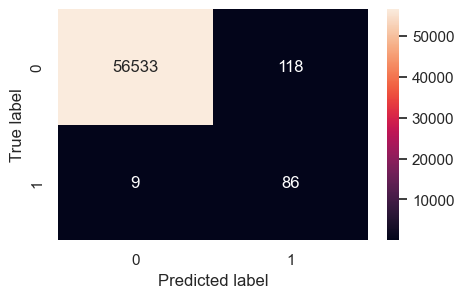

In [73]:
plot_conf_mat(y_test, test_preds[:,1].round())

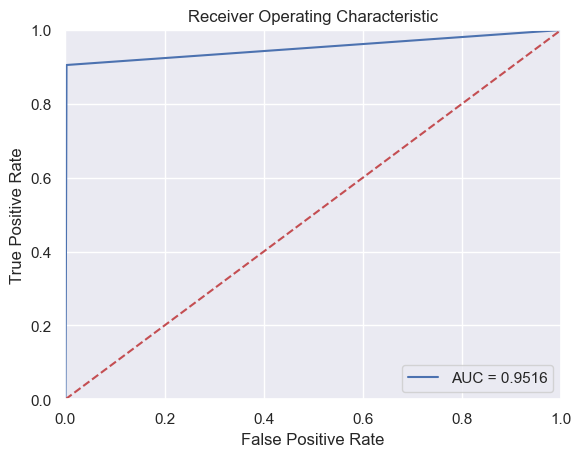

In [76]:
roc_plot(test_preds[:,1].round())